# Error Per Layered Gate (EPLG)

In [1]:
%load_ext autoreload
%autoreload 2

## Set IQM Token if using Resonance.

In [2]:
import os
os.environ["IQM_TOKEN"] = "xxxxxxxxxxxxxxxxxxxxxx"

## Choose (or define) a backend

In order to be able to use calibration fidelities as a proxy for selecting a linear chain, we need to specify the calibration URL of the station. If specifying qubit pairs manually (not necessarily forming a linear chain), this is not needed: you can simply pass the backend as a string name.

In [3]:
# To use calibration fidelities to (automatically) select a linear chain, use the following:
from iqm.qiskit_iqm.iqm_provider import IQMProvider

resonance_station="garnet"
iqm_url=f"https://cocos.resonance.meetiqm.com/{resonance_station}"
cal_url=f"https://api.resonance.meetiqm.com/quantum-computers/v1/{resonance_station}/calibrations"
provider = IQMProvider(iqm_url)
backend = provider.get_backend()

# If manually specifying qubit pairs, you can also simply use the following:
#backend="fakeapollo"

## Randomized Benchmarking Configuration

In [ ]:
from iqm.benchmarks.randomized_benchmarking.eplg.eplg import *
import numpy as np

In [5]:
EXAMPLE_EPLG = EPLGConfiguration(
    custom_qubits_array=list(backend.coupling_map),
    drb_depths=sorted(list(set(np.geomspace(1, 200, num=10, endpoint=True, dtype=int).tolist())), reverse=True),
    drb_circuit_samples=25,
    shots=2**8,
    # Parameters for a linear chain layer:
    # chain_length=30,
    # chain_path_samples=200,
    # num_disjoint_layers=4,
    # max_hamiltonian_path_tries=100,
    # calibration_url=cal_url,
)

## Run the experiment

In [6]:
benchmark_eplg = EPLGBenchmark(backend, EXAMPLE_EPLG)
run_eplg = benchmark_eplg.run()

2025-04-13 13:15:25,358 - iqm.benchmarks.logging_config - INFO - Using specified custom_qubits_array: will split into 4 disjoint layers.
2025-04-13 13:15:28,742 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries for both 1 & 2 qubits imported successfully!
2025-04-13 13:15:28,745 - iqm.benchmarks.logging_config - INFO - Executing parallel Direct RB on qubits [(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)] (group 1/4). Will generate and submit all 25 DRB circuits for each depth [200, 111, 61, 34, 18, 10, 5, 3, 1]
2025-04-13 13:15:28,748 - iqm.benchmarks.logging_config - INFO - Depth 200
2025-04-13 13:17:14,267 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [1, 0, 3, 2, 5, 4, 7, 8, 9, 10, 11, 6, 13, 12, 15, 14, 18, 17]
C:\Users\PedroFigueroaRomero\anaconda3\envs\iqm-bench\Lib\site-packages\iqm\qiskit_iqm\iqm_provider.py:177: UserWarning: Unknown backend option(s): {'calibration_set_id': None}

## Perform the analysis

In [7]:
plt.rcParams['figure.dpi'] = 175

In [27]:
result_eplg = benchmark_eplg.analyze()

2025-04-13 14:00:50,030 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Direct RB on qubits [(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)].
2025-04-13 14:00:50,082 - iqm.benchmarks.logging_config - INFO - Depth 200
2025-04-13 14:00:50,302 - iqm.benchmarks.logging_config - INFO - Depth 111
2025-04-13 14:00:50,476 - iqm.benchmarks.logging_config - INFO - Depth 61
2025-04-13 14:00:50,615 - iqm.benchmarks.logging_config - INFO - Depth 34
2025-04-13 14:00:50,774 - iqm.benchmarks.logging_config - INFO - Depth 18
2025-04-13 14:00:50,893 - iqm.benchmarks.logging_config - INFO - Depth 10
2025-04-13 14:00:51,014 - iqm.benchmarks.logging_config - INFO - Depth 5
2025-04-13 14:00:51,108 - iqm.benchmarks.logging_config - INFO - Depth 3
2025-04-13 14:00:51,176 - iqm.benchmarks.logging_config - INFO - Depth 1
2025-04-13 14:00:51,497 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Direct RB on qubits [(1, 4), (3, 0), (5, 6), (7, 2), 

**Display all the attributes in the dataset**

In [9]:
run_eplg.dataset.attrs.keys()

dict_keys(['session_timestamp', 'execution_timestamp', 'backend_configuration_name', 'backend_name', 'benchmark', 'shots', 'max_gates_per_batch', 'max_circuits_per_batch', 'calset_id', 'routing_method', 'physical_layout', 'use_dd', 'dd_strategy', 'qubits_array', 'is_eplg', 'parallel_execution', 'depths', 'num_circuit_samples', 'qiskit_optim_level', 'two_qubit_gate_ensembles', 'densities_2q_gates', 'clifford_sqg_probabilities', 'sqg_gate_ensembles', 'parallel_all_0', 0, 'parallel_all_1', 1, 'parallel_all_2', 2, 'parallel_all_3', 3, 'num_qubits', 'qubit_names', 'backend_coupling_map', 'backend_num_qubits', 'drb_depths', 'drb_circuit_samples', 'custom_qubits_array', 'chain_length', 'chain_path_samples', 'num_disjoint_layers', 'max_hamiltonian_path_tries', 'calibration_url', 'disjoint_layers', 'edges'])

## Inspect all the fidelities and the final EPLG

In [10]:
for o in result_eplg.observations:
    if o.name != "EPLG":
        print(f"{o.name} {o.identifier.qubit_indices}: {100*o.value:.2f} +/- {100*o.uncertainty:.2f} %")
    else:
        print(f"\n{o.name} {o.identifier.qubit_indices}: {o.value:.2e} +/- {o.uncertainty:.2e}")

average_gate_fidelity (1, 0): 97.97 +/- 0.04 %
average_gate_fidelity (3, 2): 97.77 +/- 0.07 %
average_gate_fidelity (5, 4): 96.95 +/- 0.30 %
average_gate_fidelity (7, 8): 97.06 +/- 0.07 %
average_gate_fidelity (9, 10): 96.44 +/- 0.12 %
average_gate_fidelity (11, 6): 97.56 +/- 0.07 %
average_gate_fidelity (13, 12): 97.33 +/- 0.09 %
average_gate_fidelity (15, 14): 96.90 +/- 0.04 %
average_gate_fidelity (18, 17): 98.11 +/- 0.06 %
average_gate_fidelity (1, 4): 97.39 +/- 0.09 %
average_gate_fidelity (3, 0): 97.71 +/- 0.03 %
average_gate_fidelity (5, 6): 96.81 +/- 0.24 %
average_gate_fidelity (7, 2): 97.87 +/- 0.10 %
average_gate_fidelity (9, 8): 96.98 +/- 0.12 %
average_gate_fidelity (11, 10): 97.63 +/- 0.09 %
average_gate_fidelity (13, 14): 97.06 +/- 0.19 %
average_gate_fidelity (15, 16): 97.75 +/- 0.07 %
average_gate_fidelity (18, 19): 98.70 +/- 0.07 %
average_gate_fidelity (3, 4): 97.62 +/- 0.06 %
average_gate_fidelity (5, 10): 96.68 +/- 0.26 %
average_gate_fidelity (7, 12): 97.80 +/- 0.

## Plot a visualization of the selected layers and all the DRB decays

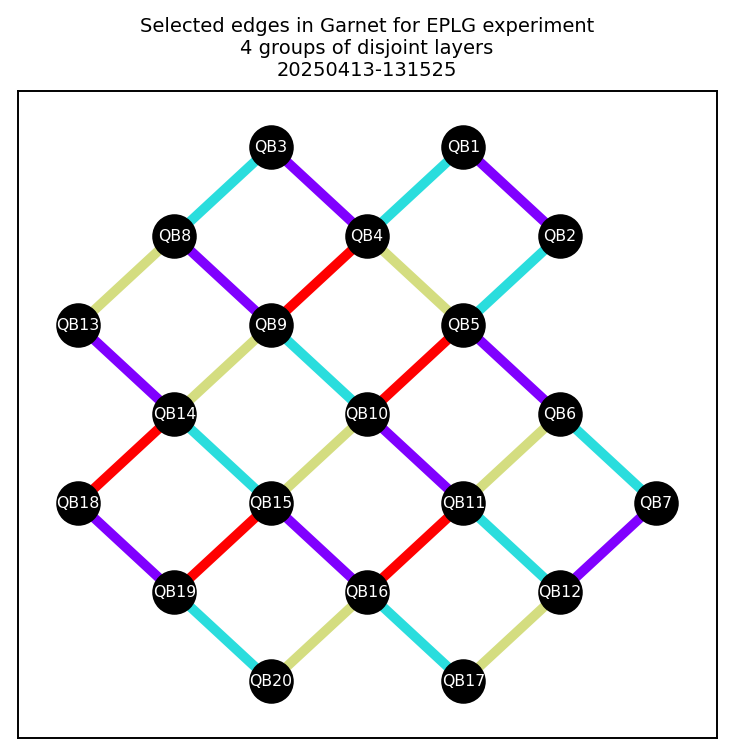

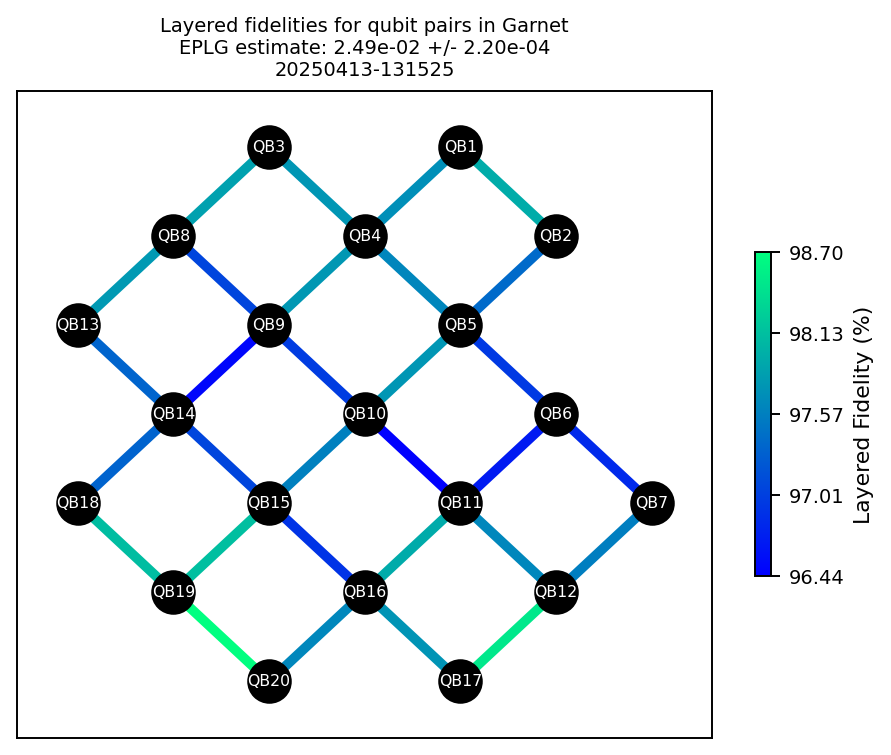

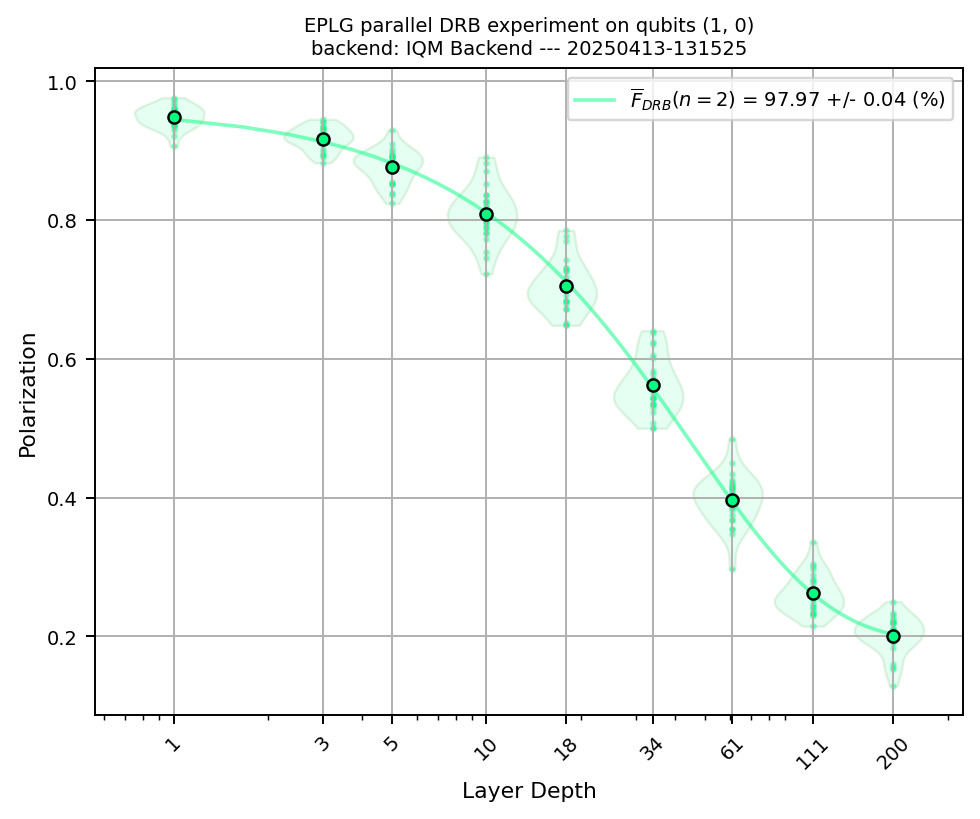

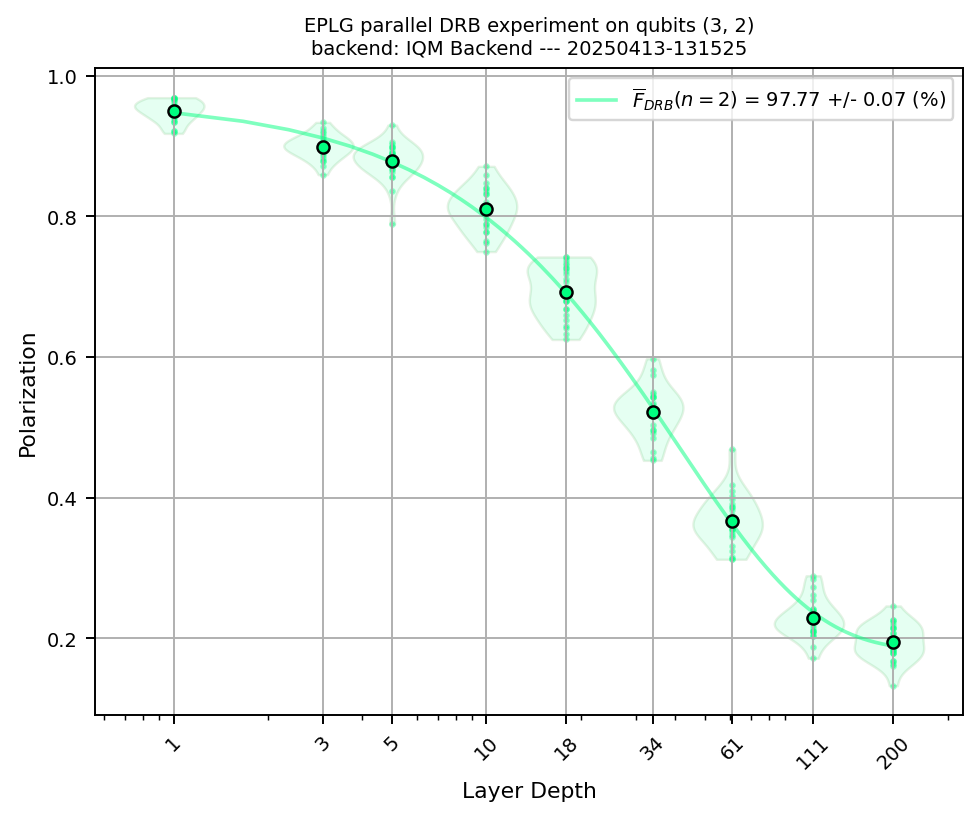

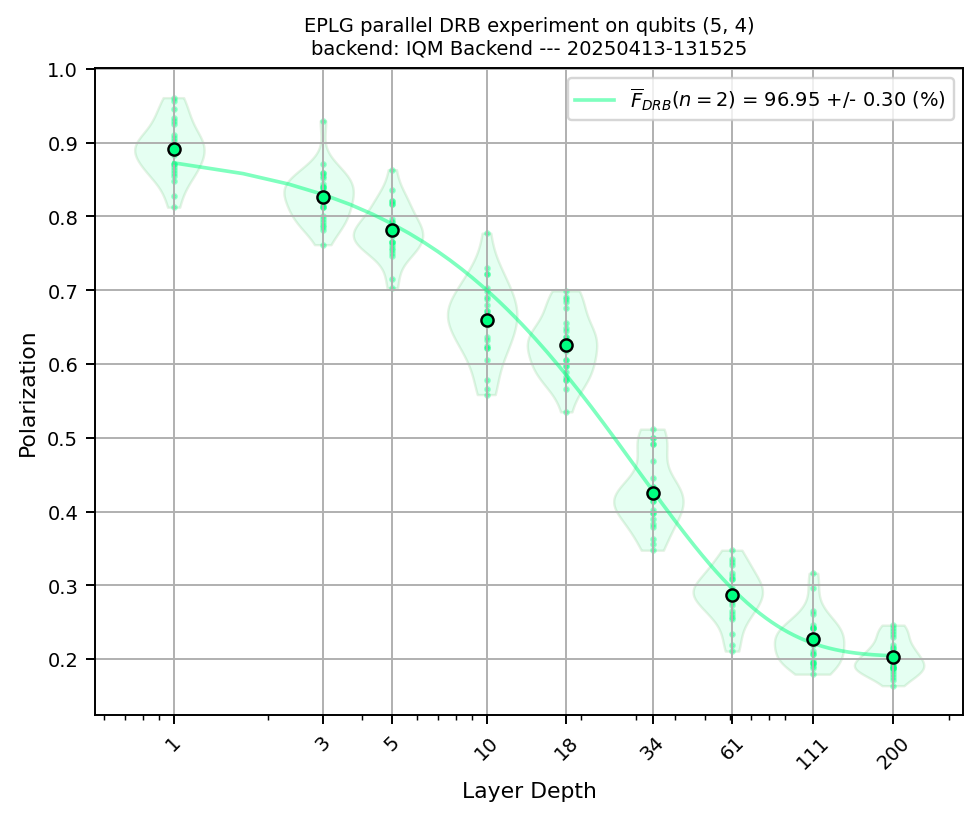

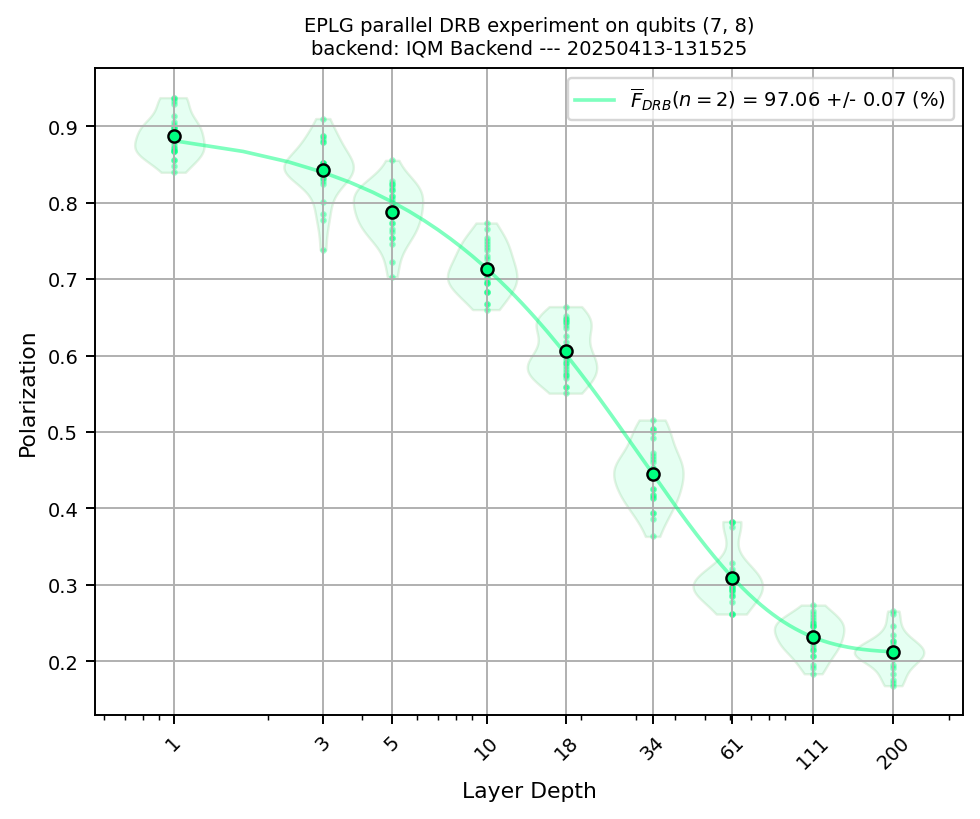

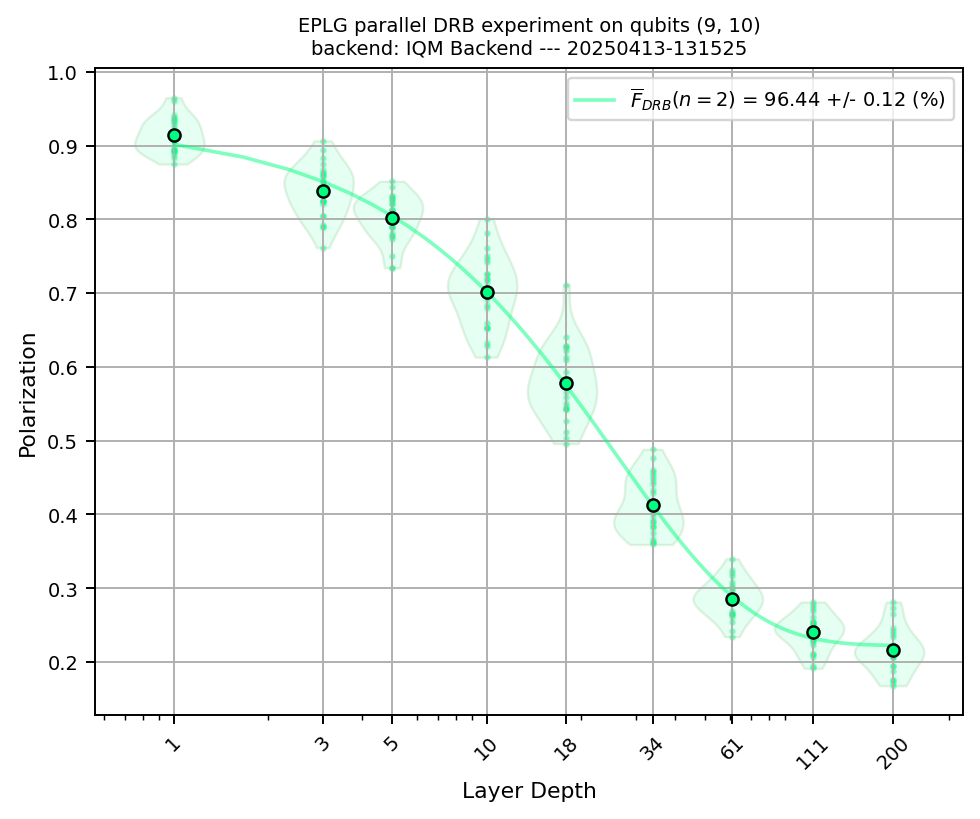

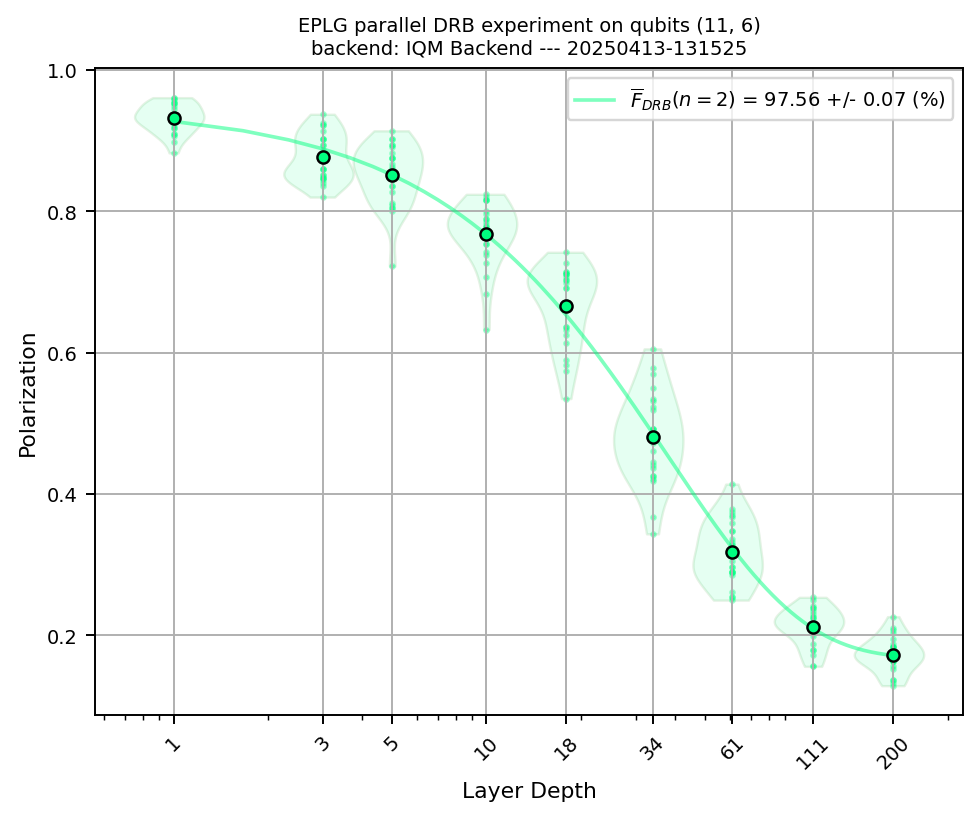

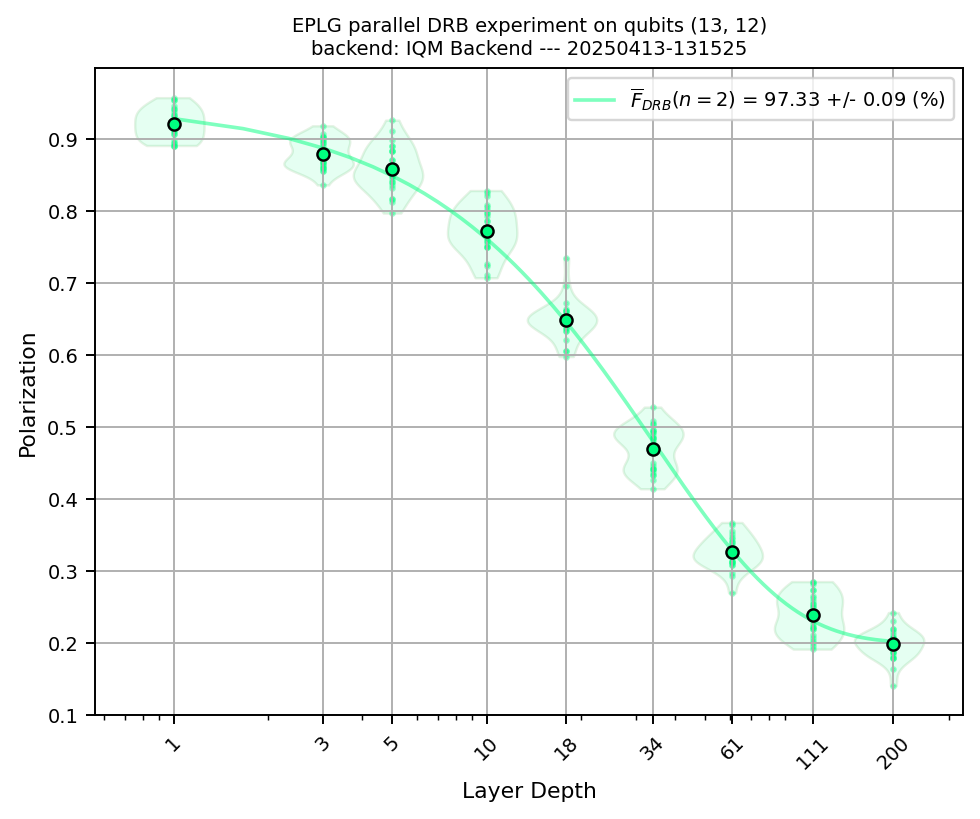

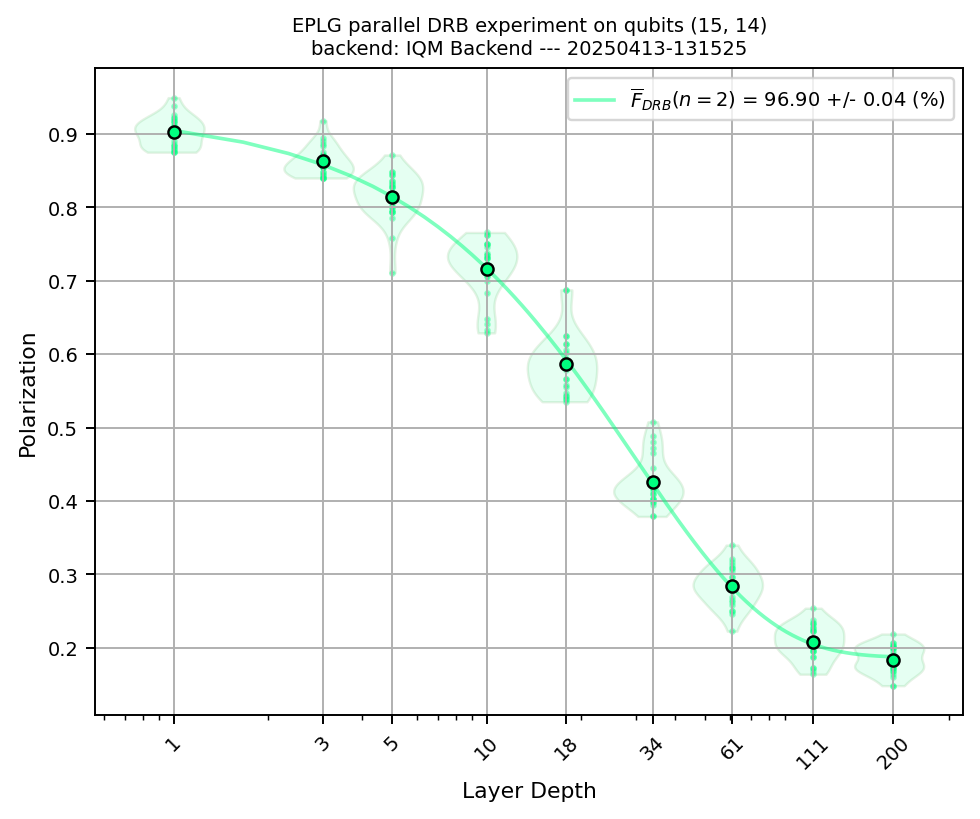

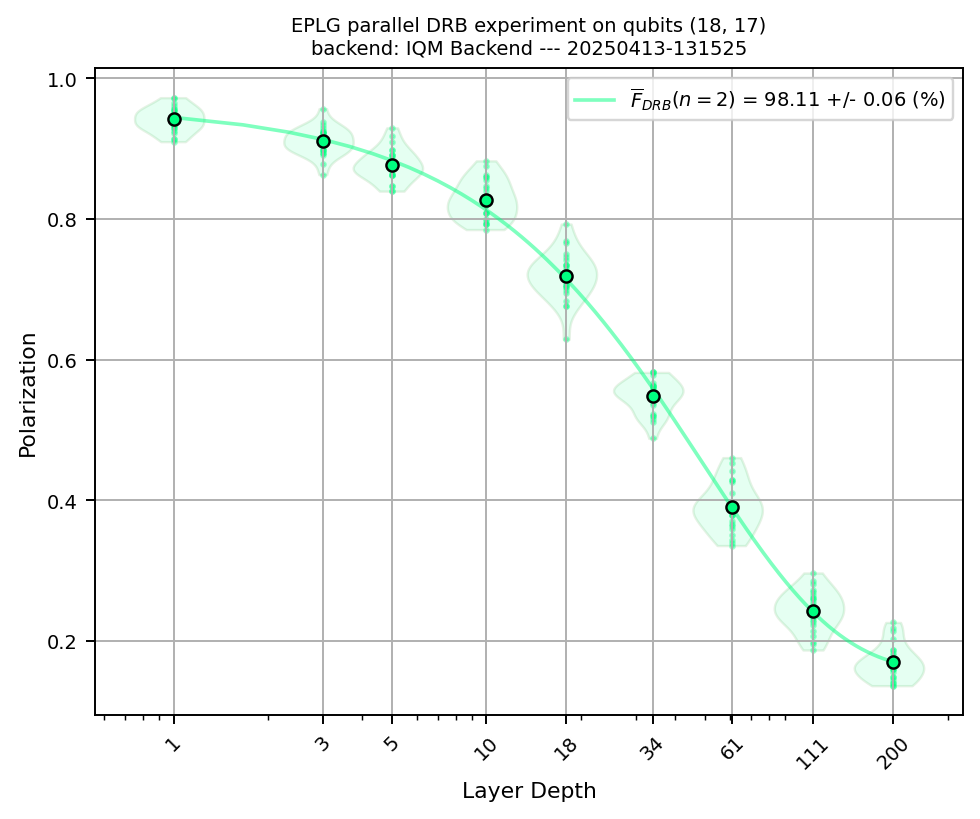

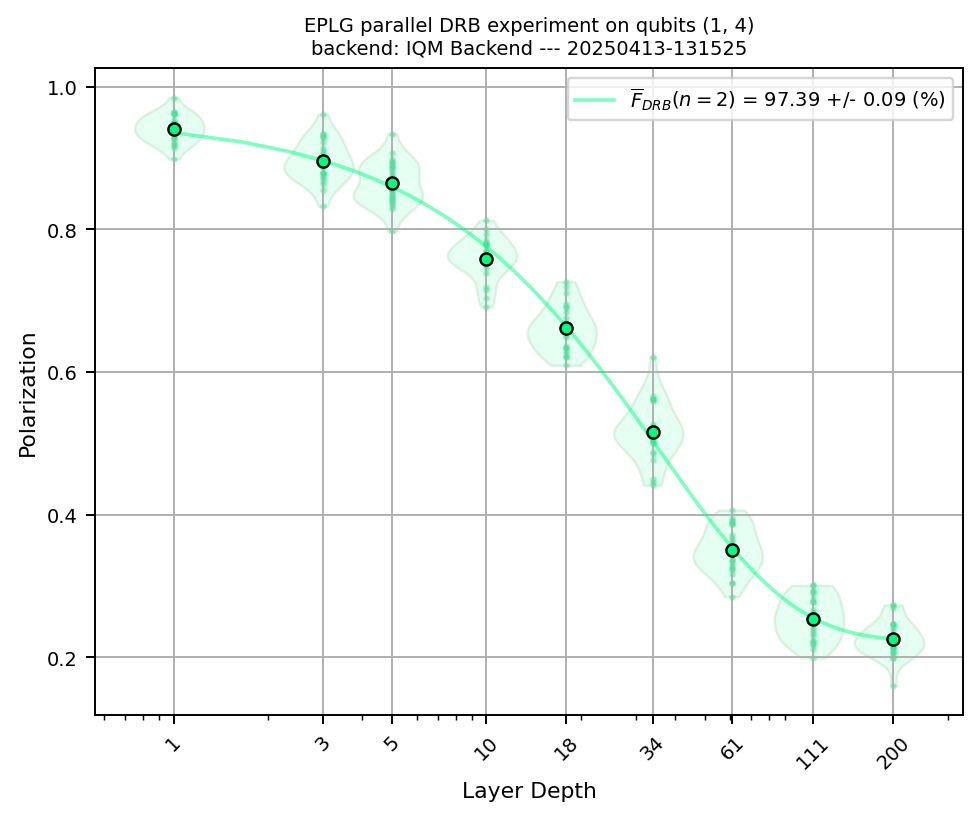

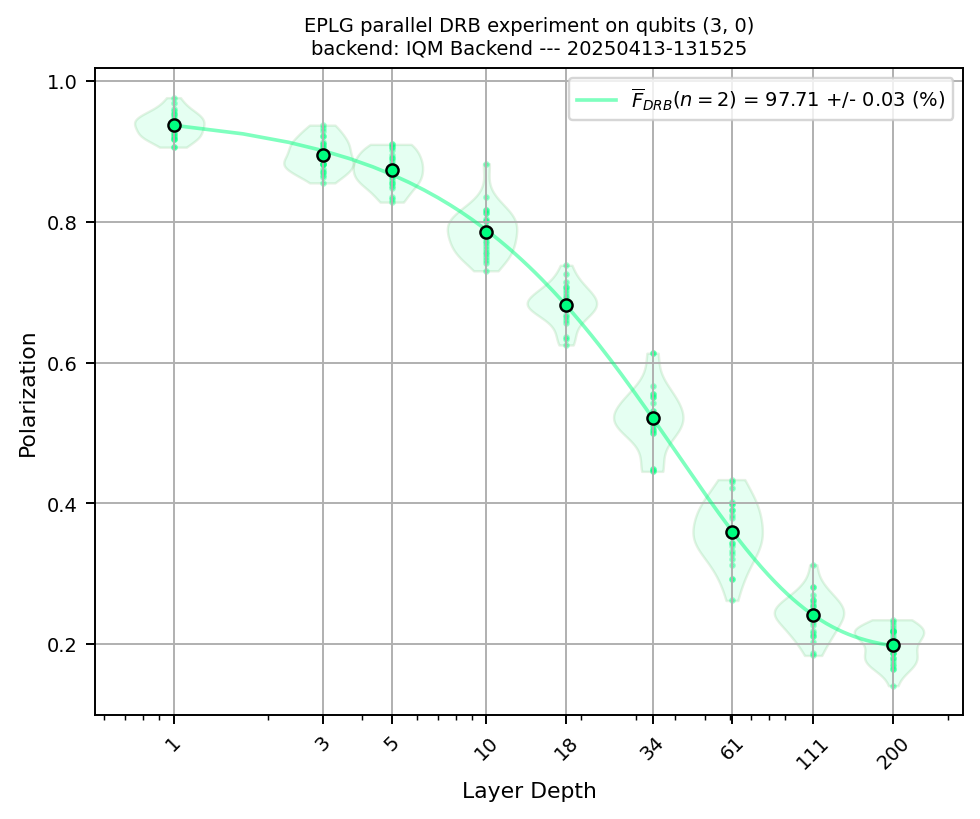

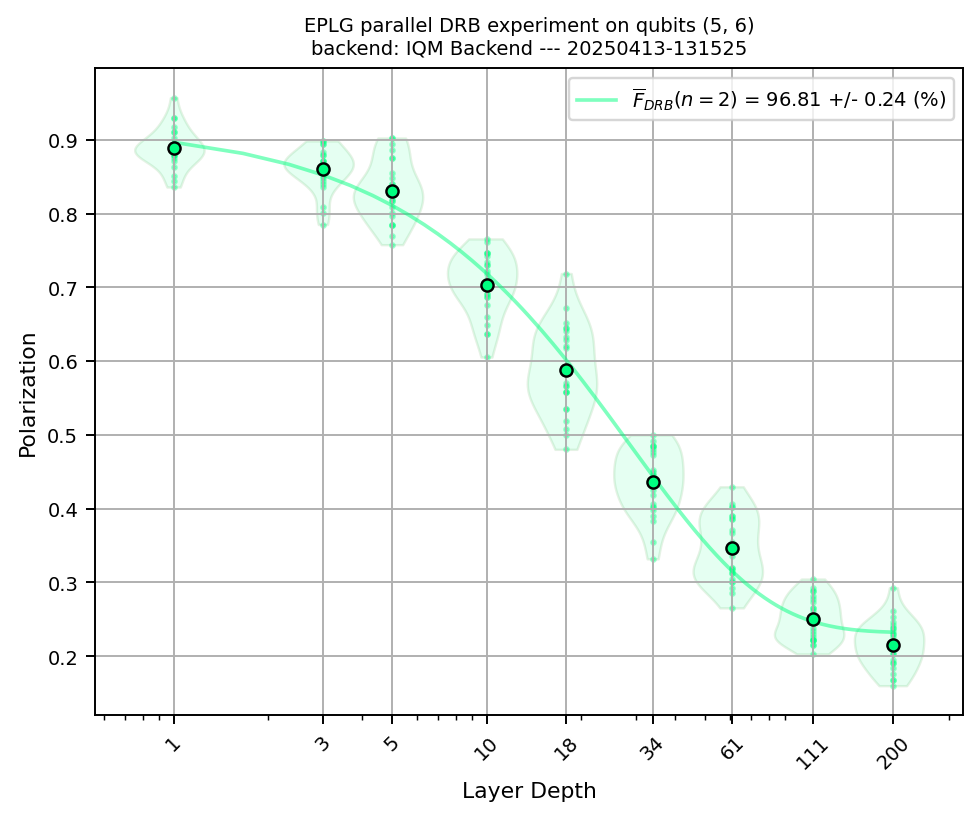

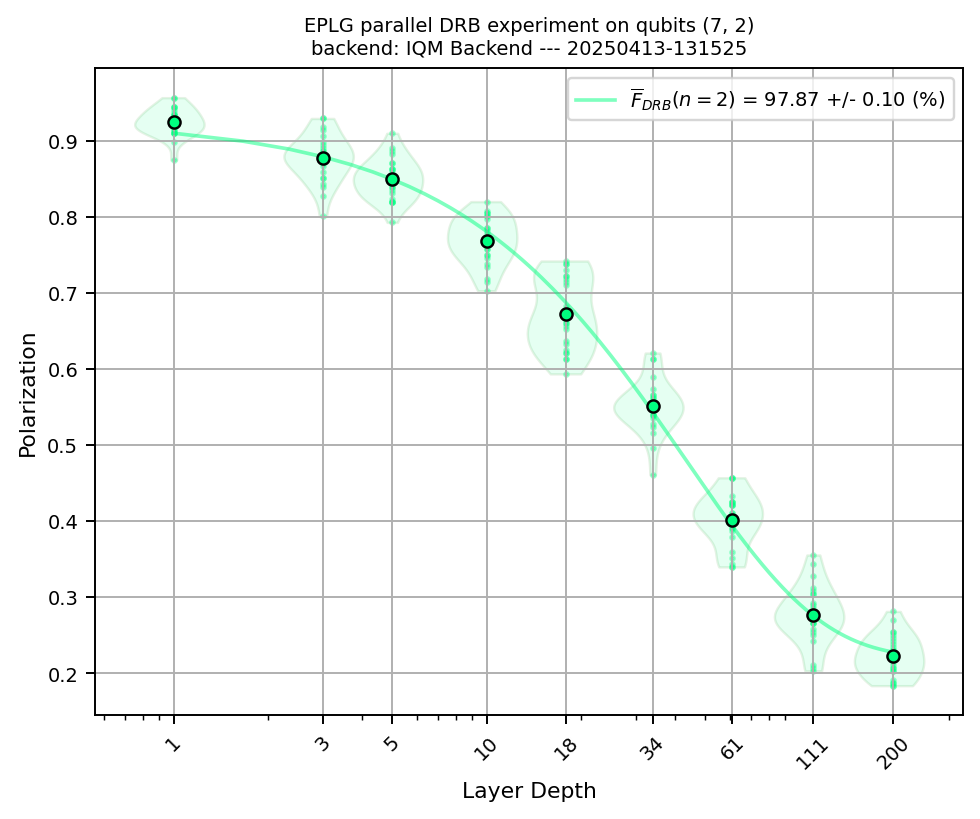

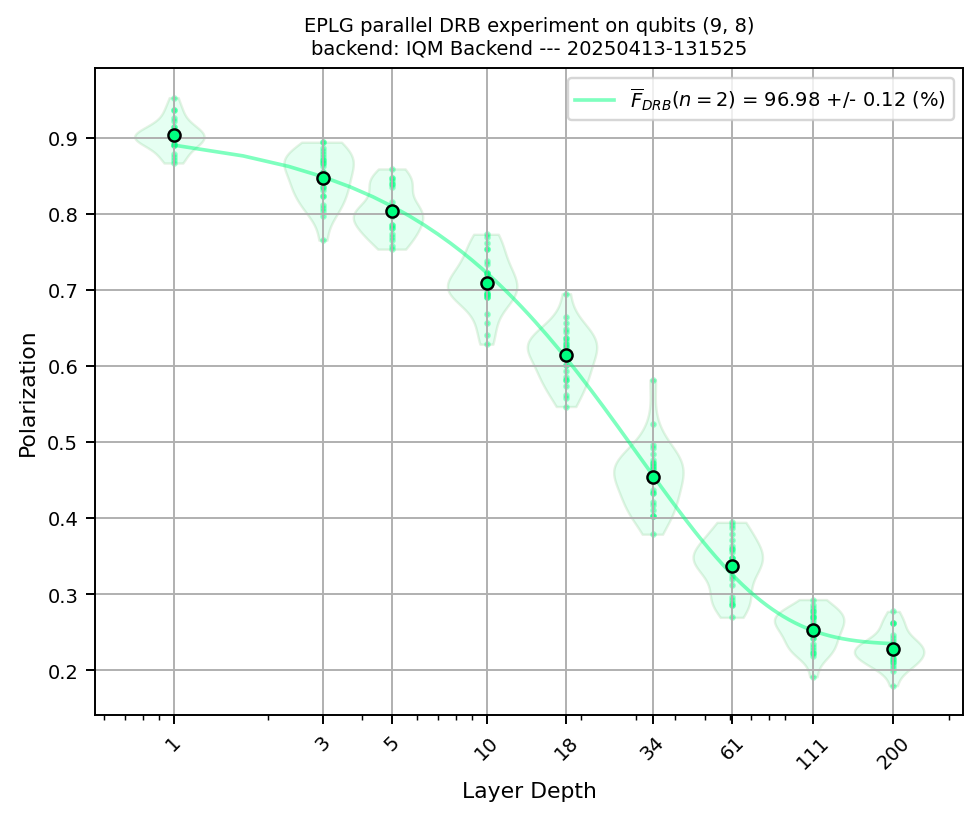

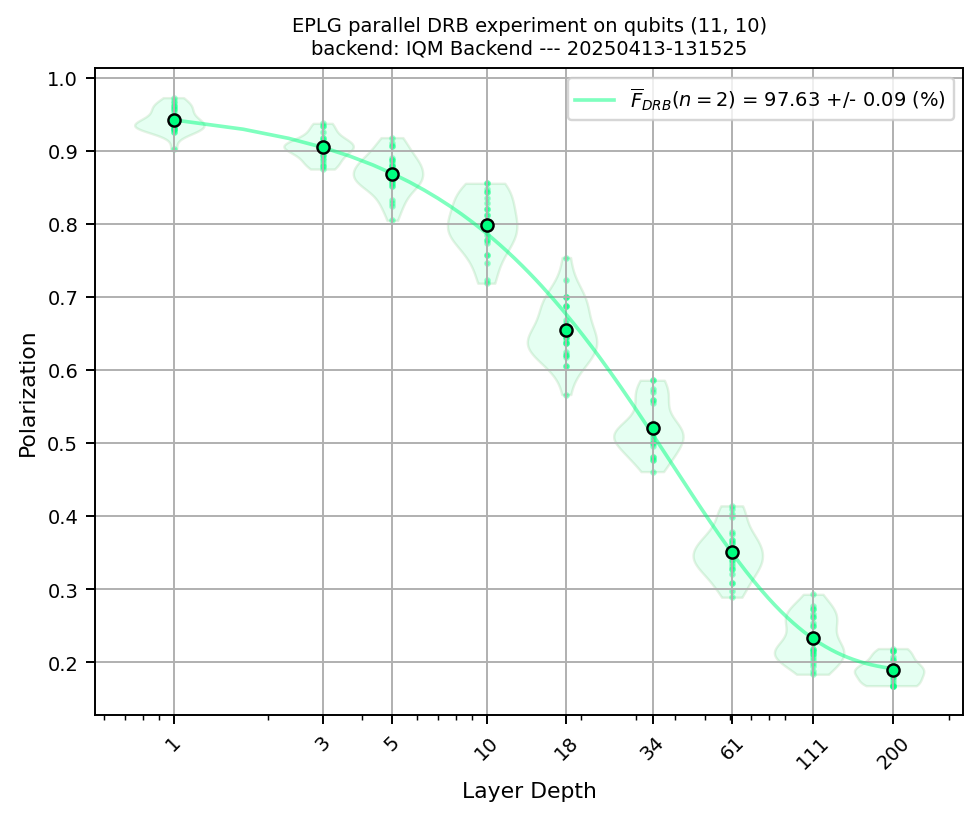

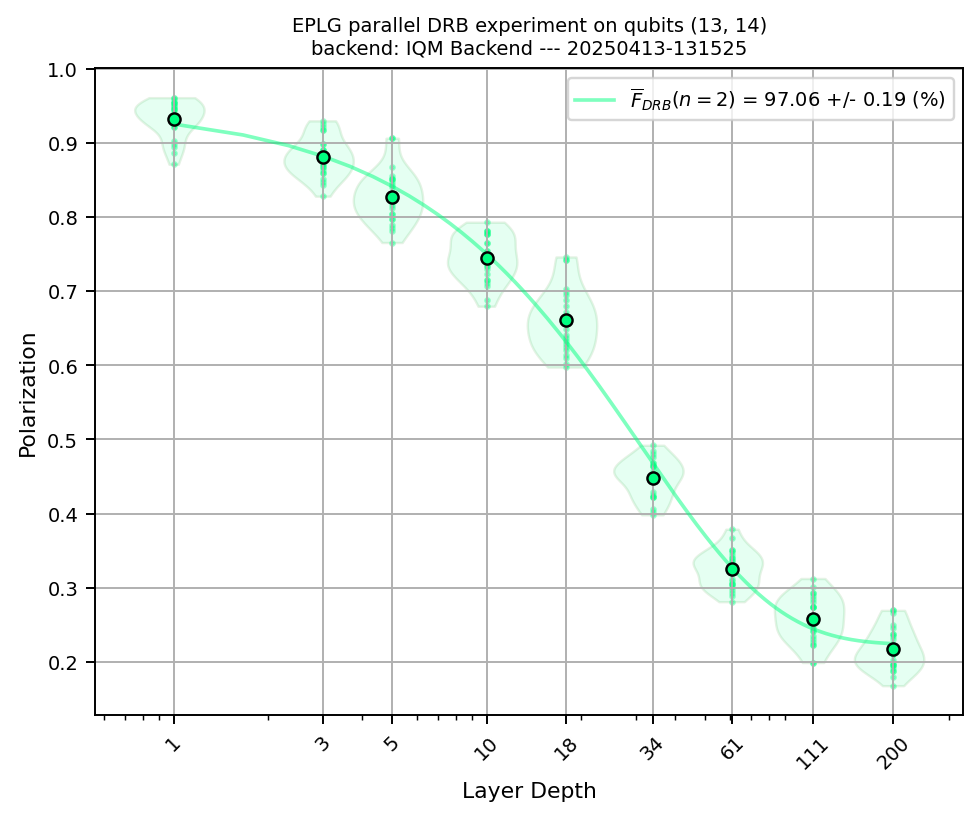

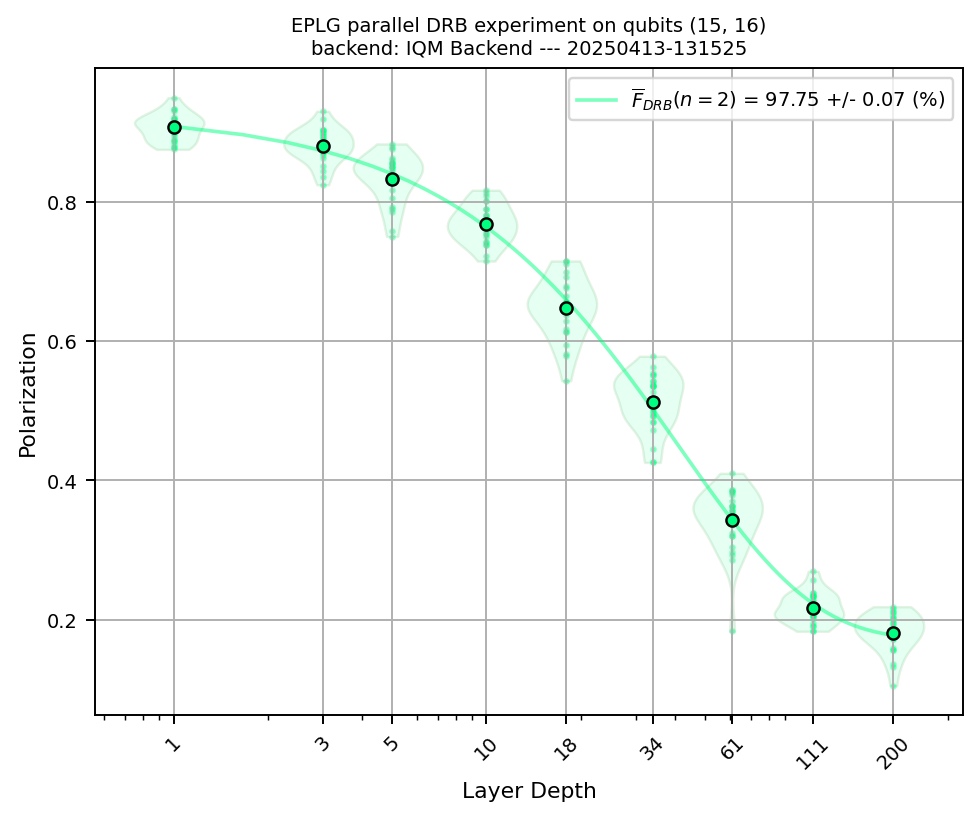

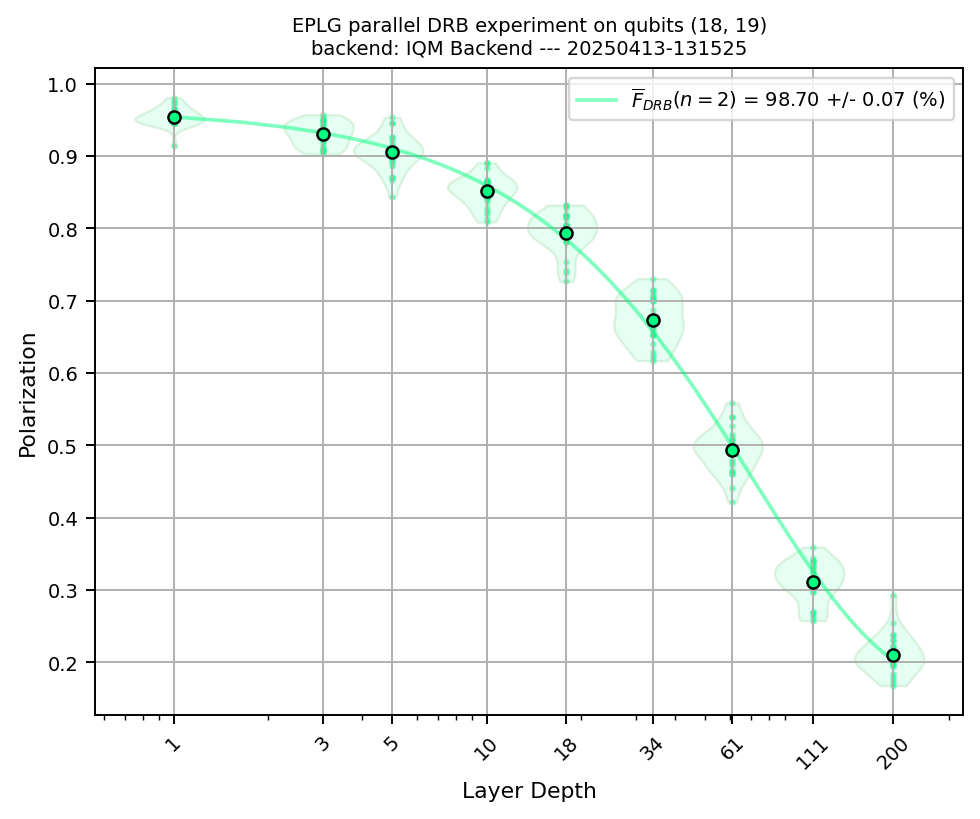

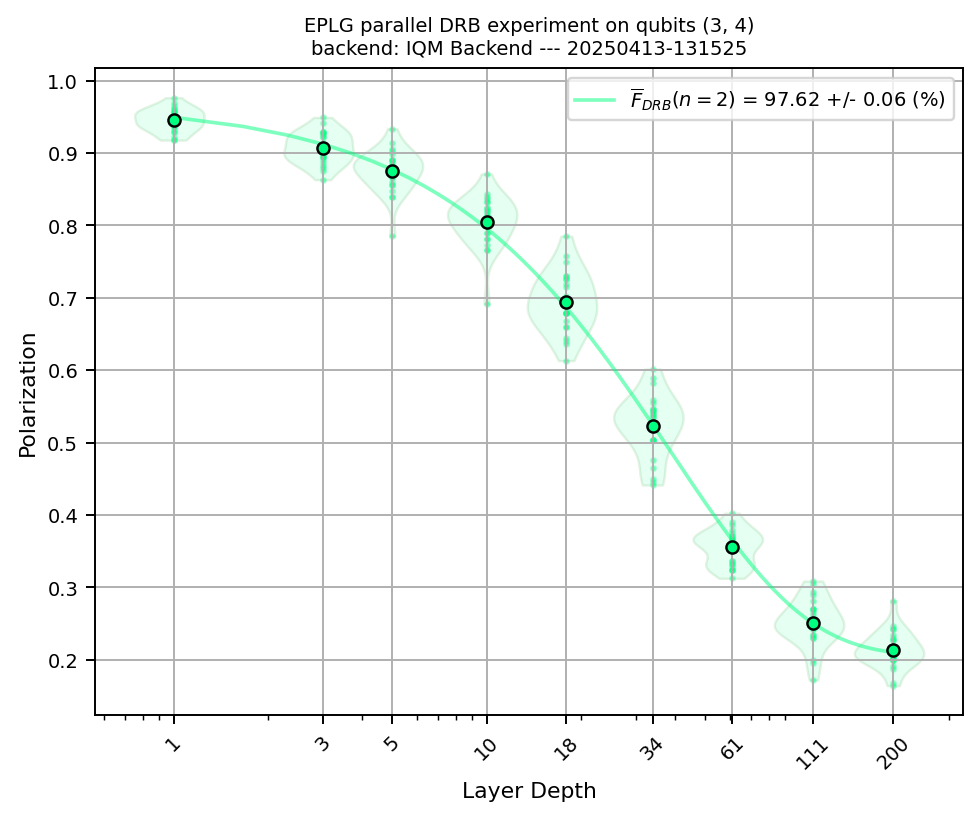

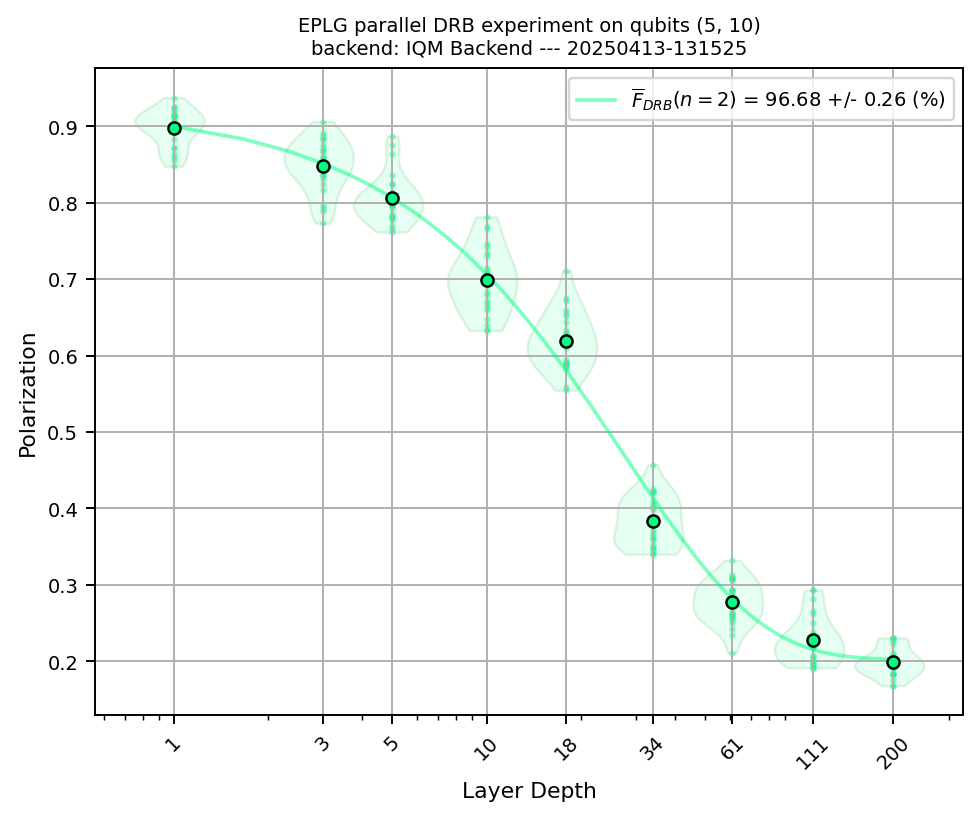

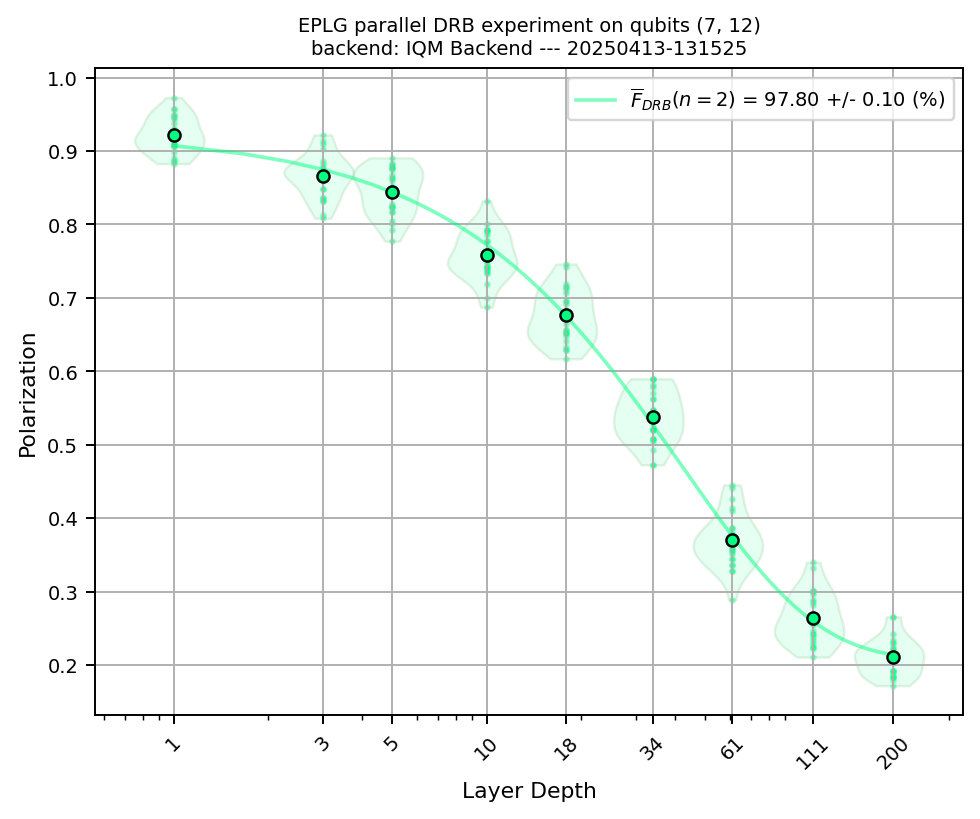

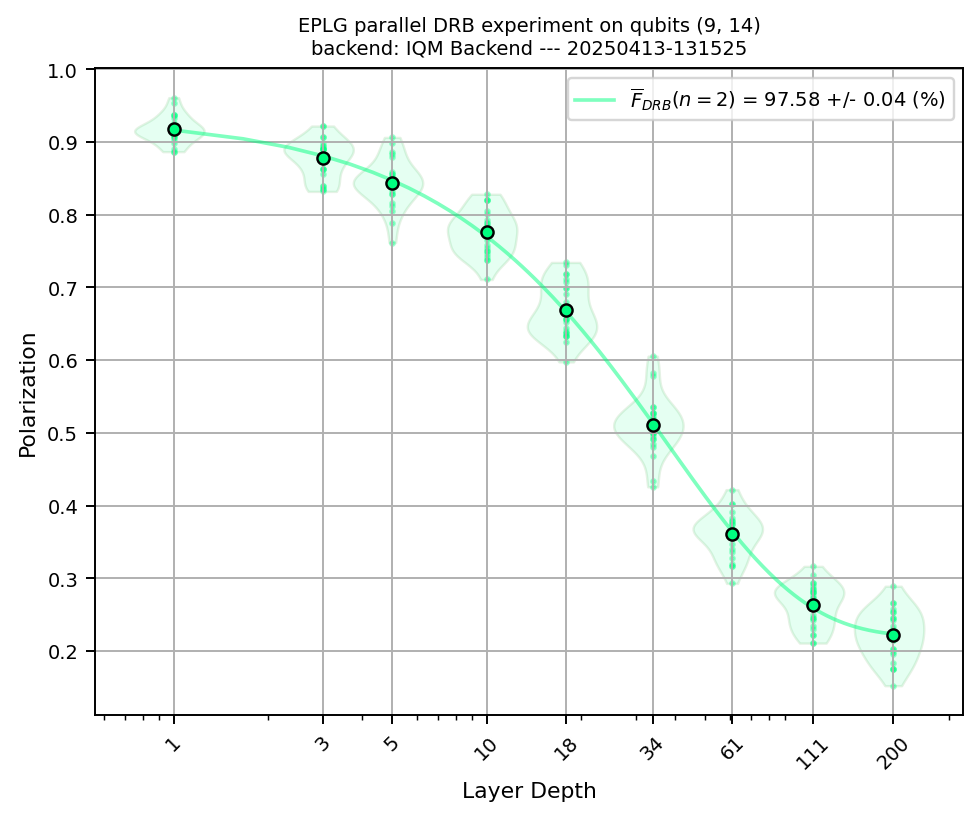

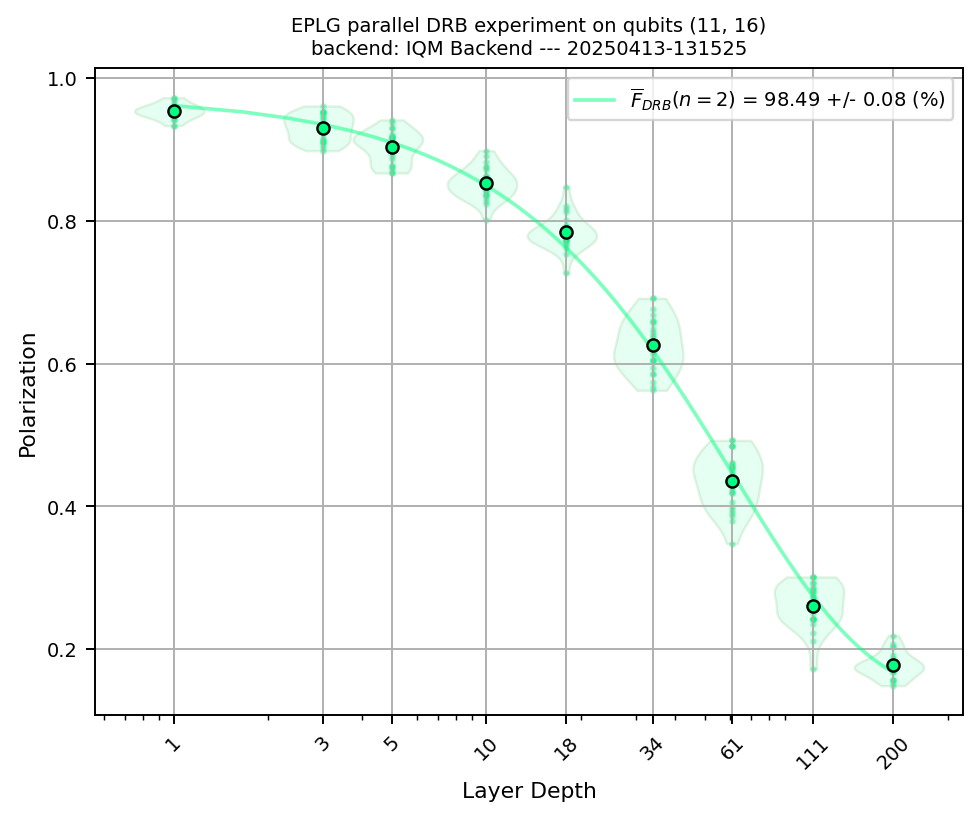

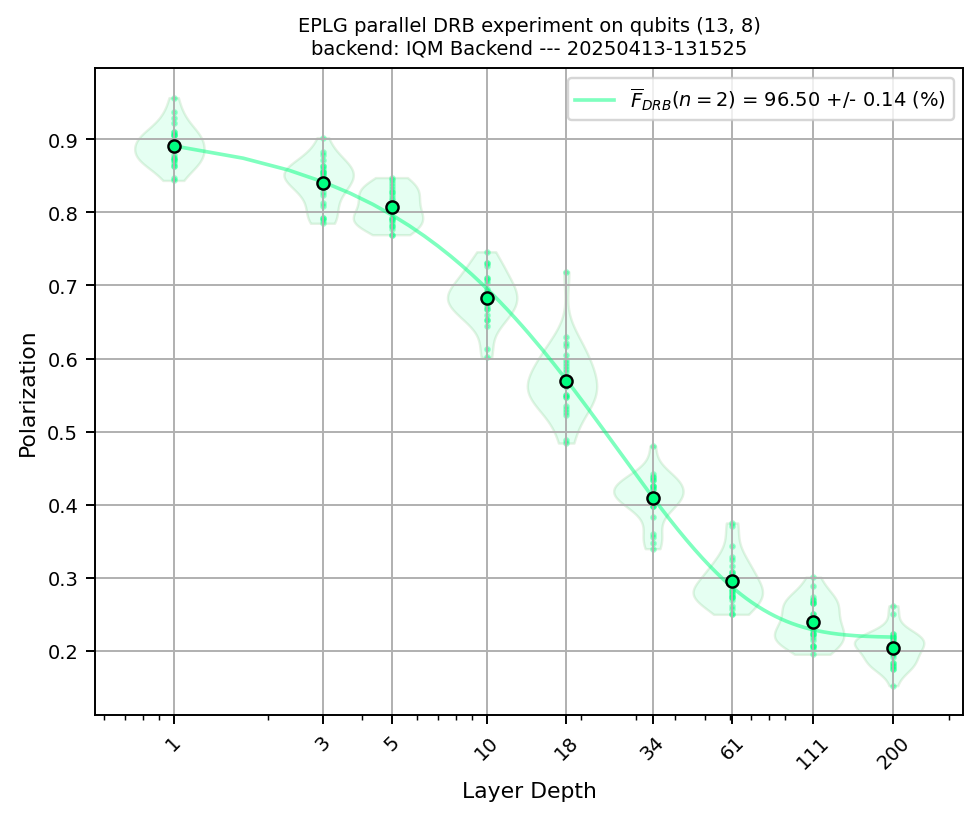

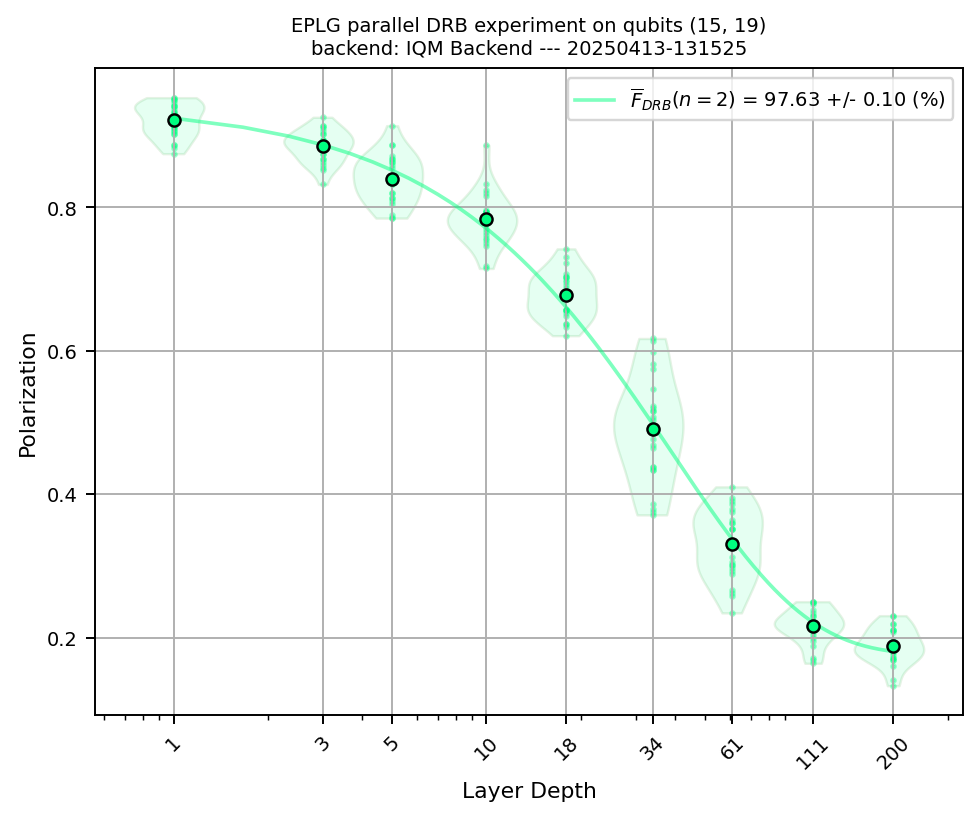

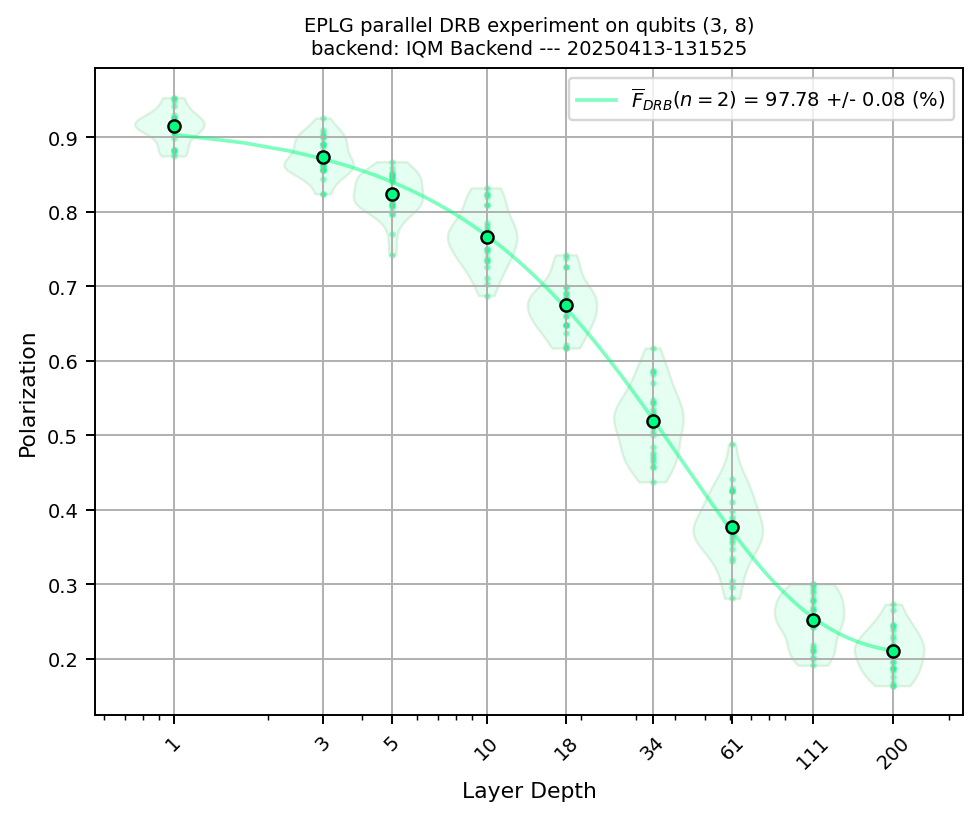

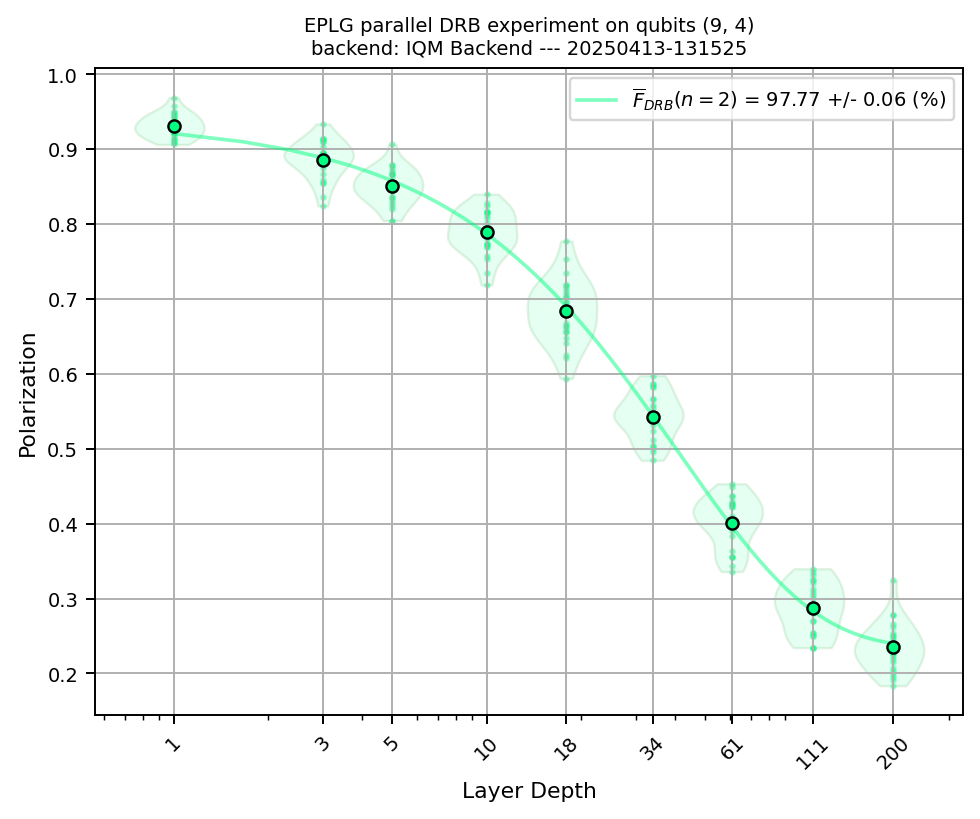

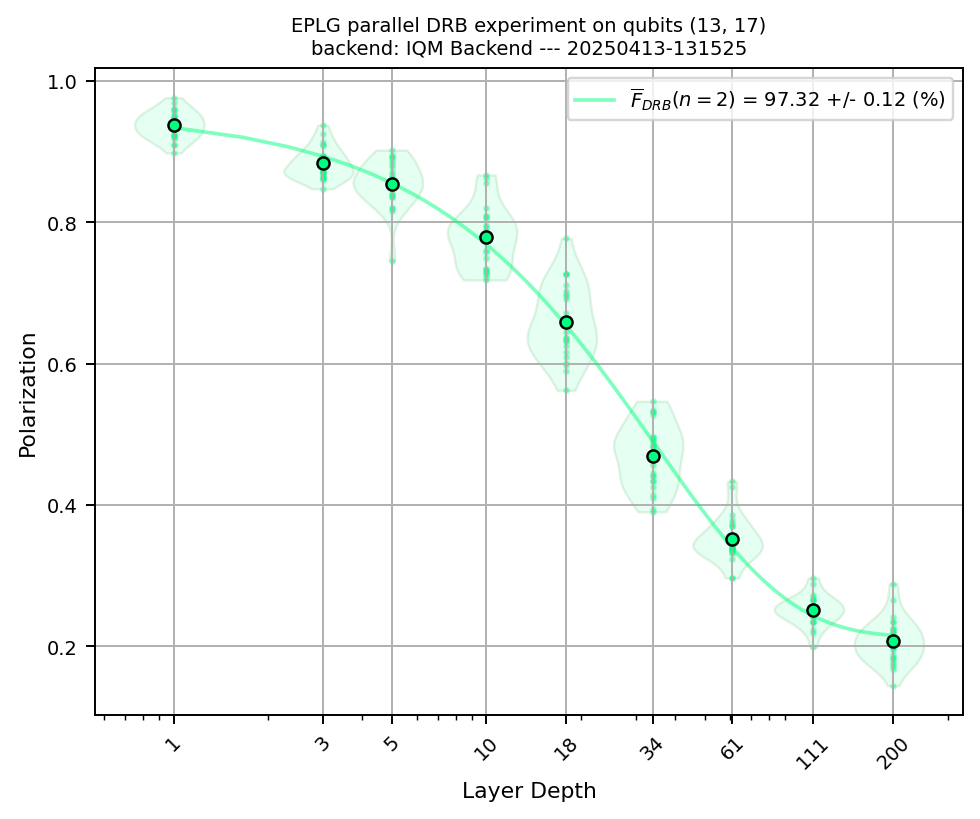

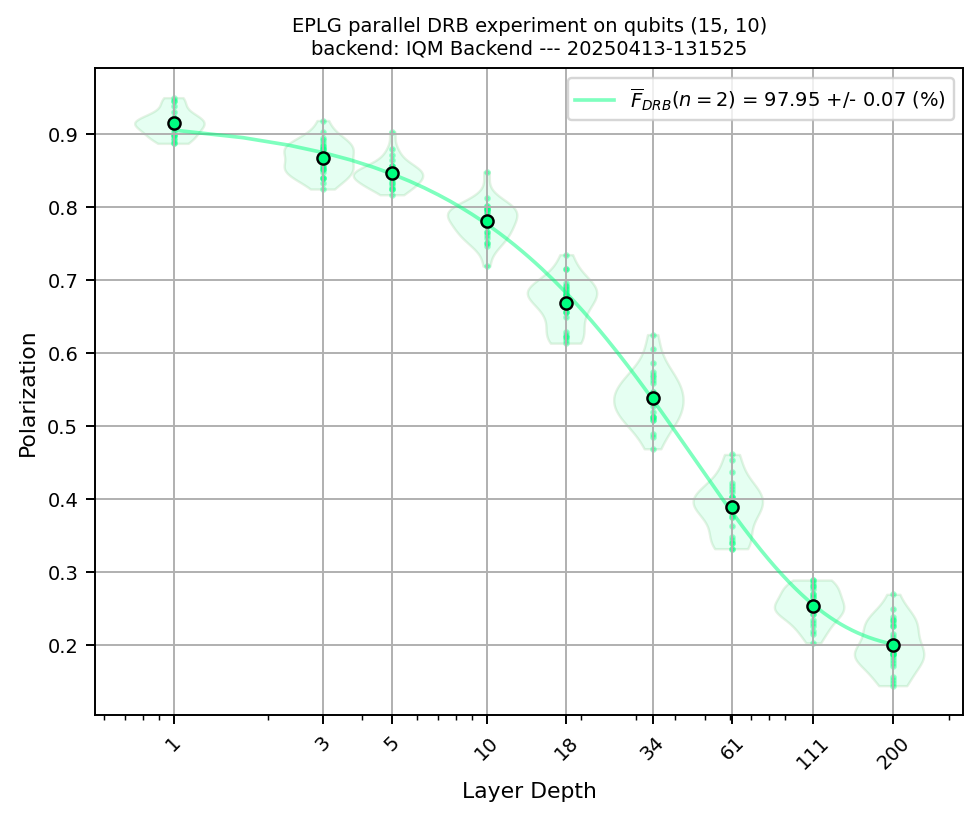

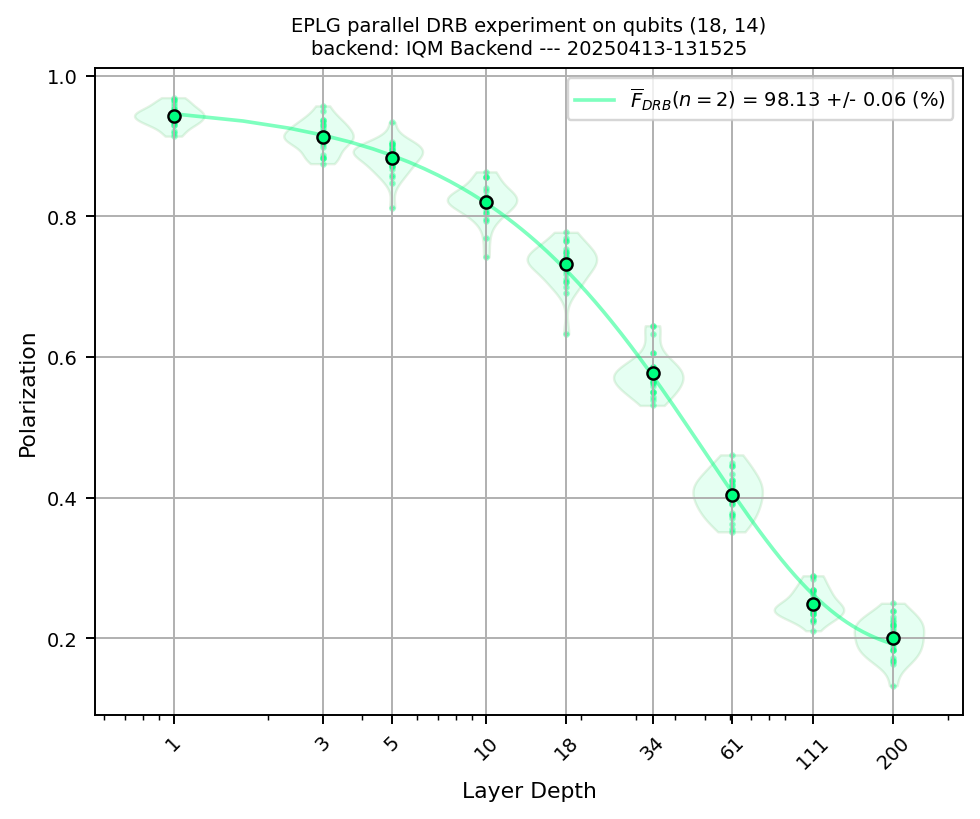

In [28]:
result_eplg.plot_all()

## Inspect a sample circuit (parallel DRB)

In [12]:
eplg_circ_names = benchmark_eplg.circuits.benchmark_circuits[0].group_names
for x in eplg_circ_names:
    print(x)

[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_200
[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_111
[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_61
[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_34
[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_18
[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_10
[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_5
[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_3
[(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_1
[(1, 4), (3, 0), (5, 6), (7, 2), (9, 8), (11, 10), (13, 14), (15, 16), (18, 19)]_depth_200
[(1, 4), (3, 0), (5, 6), (7, 2), (9, 8), (11, 10), (13, 14), (15, 16), (18, 19)]_depth_111
[(1, 4), 

Circuit group name: [(1, 0), (3, 2), (5, 4), (7, 8), (9, 10), (11, 6), (13, 12), (15, 14), (18, 17)]_depth_5


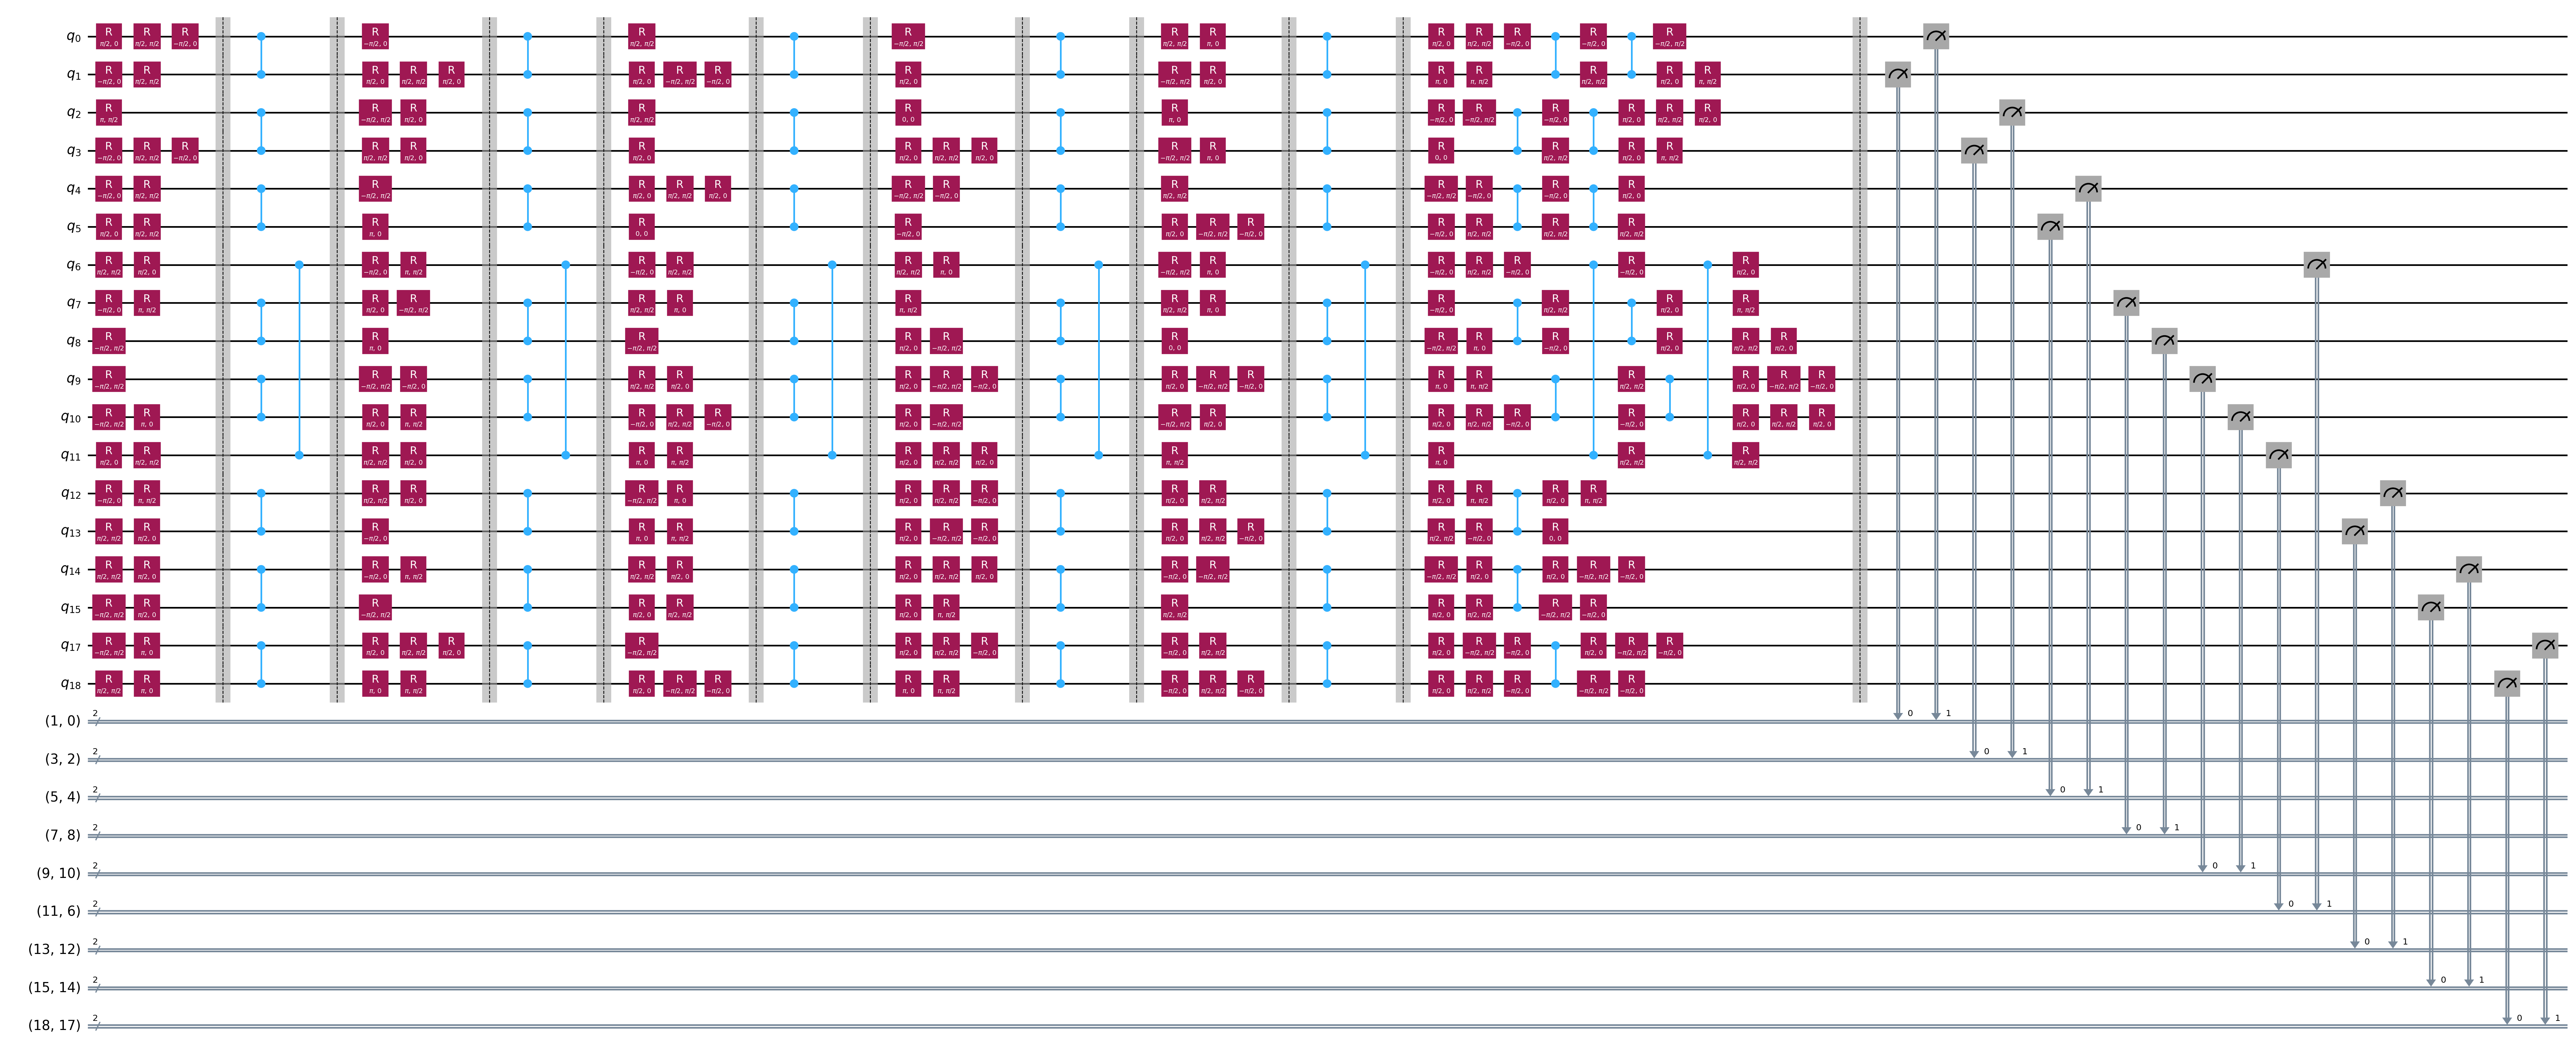

In [16]:
circ_group_idx = 6
circ_sample = 6

print(f"Circuit group name: {eplg_circ_names[circ_group_idx]}")

circuit_to_draw = benchmark_eplg.circuits.get_benchmark_circuits_by_name('transpiled_circuits').circuit_groups[circ_group_idx].circuits[circ_sample]

circuit_to_draw.draw(output='mpl', fold=0, idle_wires=False)